## Task 1: Import Libraries:
a. Import required libraries 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

## Task 2: Import Dataset:
a. Load dataset using keras API.
b. Dataset must be pre-processed before training the network, if you check image in
the training, you will see pixel value range from 0 to 255, scale these values range
from 0 to 1. 

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Visualize 

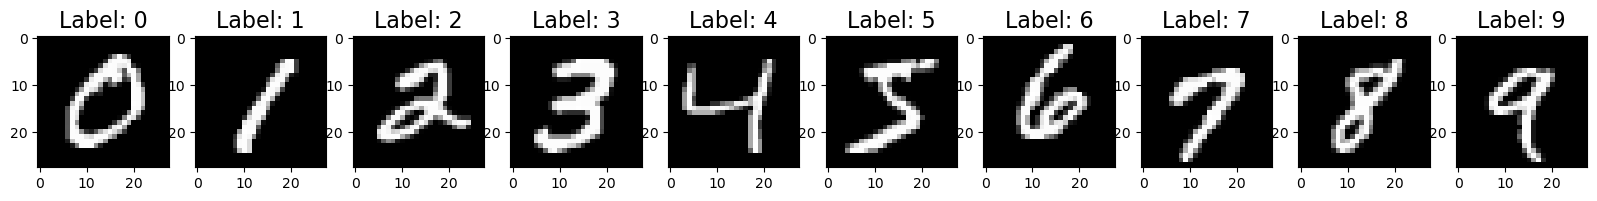

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[Y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
for i in range(10):
    print(Y_train[i])

5
0
4
1
9
2
1
3
1
4


### Prepare Data

In [7]:
# Normalize Data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Task 3: Build a Classifier using MLP
a. The layer is the most fundamental component of a neural network. Data is put into
layers, and they extract representations from it. Choose the number of stacking
layers so that model representations should, be useful for the given task.


In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Task 4: Compile the Model
a. A few more parameters are required before the model can be used for training.
These are added at the build step of the model: Choose these parameters.
a.1 Loss function
a.2 Optimizer
a.3 Metrics


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,Y_train,batch_size=512,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.6519 - accuracy: 0.8277 - val_loss: 0.3030 - val_accuracy: 0.9178
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2784 - accuracy: 0.9224 - val_loss: 0.2352 - val_accuracy: 0.9339
Epoch 3/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2200 - accuracy: 0.9377 - val_loss: 0.1974 - val_accuracy: 0.9467
Epoch 4/30
94/94 [==============================] - 1s 10ms/step - loss: 0.1833 - accuracy: 0.9482 - val_loss: 0.1713 - val_accuracy: 0.9521
Epoch 5/30
94/94 [==============================] - 1s 11ms/step - loss: 0.1559 - accuracy: 0.9563 - val_loss: 0.1571 - val_accuracy: 0.9574
Epoch 6/30
94/94 [==============================] - 1s 10ms/step - loss: 0.1358 - accuracy: 0.9622 - val_loss: 0.1401 - val_accuracy: 0.9605
Epoch 7/30
94/94 [==============================] - 1s 9ms/step - loss: 0.1188 - accuracy: 0.9663 - val_loss: 0.1309 - val_accuracy: 0.9610
Epoch 8/30
94/94

In [14]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9763


[0.07637625187635422, 0.9763000011444092]

## Task 5: Train and Test the model.
a. Feed the training data to the built model.
b. Ask model to make predictions about a test set.
c. Verify that the predictions match the labels from the test labels.


In [15]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[8.9177249e-08, 6.7606174e-09, 1.9370513e-05, ..., 9.9477357e-01,
        3.7691593e-06, 1.3185829e-05],
       [3.9230997e-08, 3.1068539e-06, 9.9999619e-01, ..., 9.9312724e-15,
        5.2473748e-08, 3.2084215e-15],
       [2.3699663e-06, 9.9925345e-01, 1.2093849e-04, ..., 2.4297296e-04,
        2.8753519e-04, 5.7641801e-06],
       ...,
       [3.3751643e-12, 1.7968124e-11, 2.8450601e-11, ..., 1.2783447e-07,
        6.7053463e-07, 1.0254182e-05],
       [2.1755679e-11, 8.1730158e-13, 6.1345188e-15, ..., 3.6691080e-12,
        2.6653242e-06, 4.2770193e-14],
       [2.0395239e-09, 2.2562477e-12, 8.9221155e-09, ..., 1.3353751e-13,
        1.8091610e-11, 2.4837007e-12]], dtype=float32)

In [16]:
# Predict class indices
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display the predicted class indices
print(predicted_classes)

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


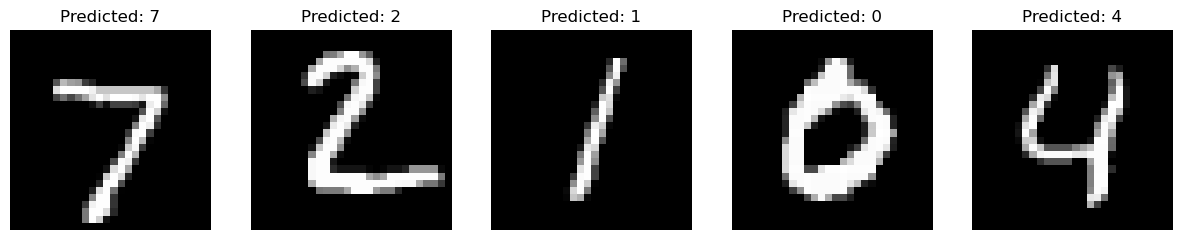

In [17]:
# Display a few test images along with their predicted classes
num_images_to_display = 5

# Set up a single row of subplots
plt.figure(figsize=(15, 3))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')  # Turn off axis labels for cleaner display

plt.show()


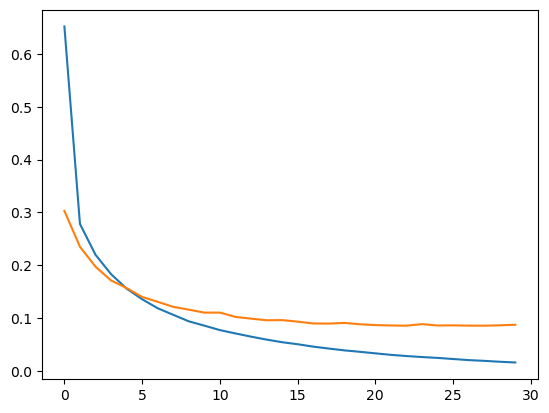

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

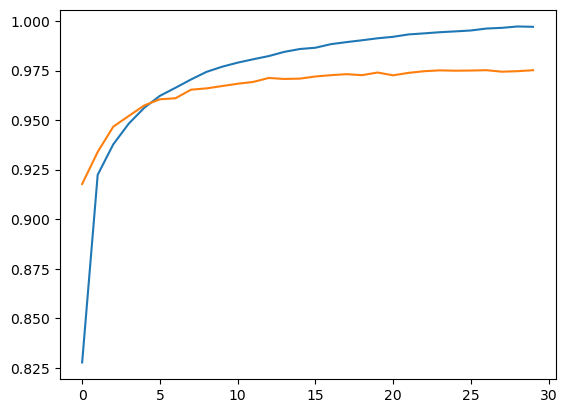

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])